<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [307]:
!pip install ydata_profiling

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport
import re
import warnings
import phik
from phik import resources, report

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

random_state=42

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here` Random seed фиксируем для воспроизводимости результатов

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [309]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

### Для train

In [310]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [311]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [312]:
# Проверим train на пропуски

df_train_dub = df_train.isna().sum()
df_train_dub[df_train_dub>0]

,0
mileage,202
engine,202
max_power,196
torque,203
seats,202


Пропуски наблюдаем в колонках `mileage`, `engine`, `max_power`, `torque`, `seats`

In [313]:
# Провери train на дубли

df_train.duplicated().sum()

np.int64(985)

Всего в train 985 полных дублей

In [314]:
profile = ProfileReport(df_train, title="Profiling Report")
profile

Output hidden; open in https://colab.research.google.com to view.

## Выводы (train)

Описательные статистики (чтобы понять с какими данными работаем):
1. Наиболее популярные марки авто - maruti, hyundal
2. Данные в датасете в основном с 2025 до 2020 года, пик приходится на ~2017 год, второй пик - на ~2013 год
3. В основном стоимость автомобилей не превосходит 1 мл руб (по гистограмме), но есть выбросы и до 10 млн. Среднее значение ~640 тыс
4. В данных нет машин с нулевым пробегом, минимальное значение - 1км. Средний пробег - 70 тыс км. В основном данные по машинам с пробегом менее 150 тыс км. Максимальный пробег - 2.3 млн км
5. Больше всего данных по автомобилям на топливе дизель и бензин
6. В основном у нас машины от индивидуальных продавцов, есть небольшая доля от дилеров и еще меньше - от сертифицированных дилеров/дилеров с высоким уровнем доверия (тут с интерпретацией категорий помогал DeepSeek)
7. 87.1% машин на ручном управлении (механика), оставшиеся 12.9% - на автомате
8. 65.5% машин от владельцев, которые первыми владеют этими машинами, 25.6% - от второго владельца, остальные 8.9% от третьего и более. Также присутствует интересная категория `Test Drive Car` -  демонстрационная машина. Таких всего 4 шт
9. Есть ряд колонок, которые являются числовыми но по каким-то причинам в датасете отображаются как текст. До предобработки выводы по ним сделать сложно. Это колонки `mileage`, `engine`, `max_power`, `torque`
10. Кол-во посадочных мест в основном 5 и 7 (стандарт для большинства авто), но также есть авто с кол-вом посадочных мест от 2 до 10

Взаимосвязи:
1. Между ценой и признаками `year`, `km_driven`, `seats` есть +- линейная взаимосвязь
2. Также наблюдаем достаточно высокую корреляцию цены и `transmission` (механика/автомат)
3. Есть большая отрицательная корреляция между годом и пробегом (что вполне логично. Чем старше машина, тем больше ее могли использовать в движении)



### Для test

In [315]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [316]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [317]:
# Проверим test на пропуски

df_test_dub = df_test.isna().sum()
df_test_dub[df_test_dub>0]

,0
mileage,19
engine,19
max_power,19
torque,19
seats,19


Пропуски наблюдаем в колонках `mileage`, `engine`, `max_power`, `torque`, `seats`

In [318]:
# Провери test на дубли

df_test.duplicated().sum()

np.int64(62)

Всего в train 62 полных дублей

In [319]:
profile = ProfileReport(df_test, title="Profiling Report")
profile

Output hidden; open in https://colab.research.google.com to view.

## Выводы (для test)
Буду описывать как отличия от train

Описательные статистики:
1. Распределение кол-ва машин более похоже на половину нормального (правая часть до середины). Пиковые значения менее выражены.
2. За счет разного масштаба по оси OX распределение выглядит более «щетинистым». Но в целом все статистики длизки к train
3. В кол-ве посадочных мест более выражены категории в 5 и 7 мест. Остальные категории встречаются реже, чем в train

Взаимосвязи
1. Явная линейная зависимость цены прослеживается только с годом выпуска. Для пробега - облако точек сконцентрировано в квадрате [0, 1 млн] * [0, 200 тыс км].

Вывод по видам визуализации: точечный график для интерпретации более понятный, чем график с сотами


**Ваш ответ здесь.** Описала выше

Достаточно много пропущенных, количество дубликатов не так критично.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

### Для train

In [320]:
# для количественных признаков
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [321]:
# для категориальных (+ числовых которые сейчас выглядят как категориальные)
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


### Для test

In [322]:
# для количественных признаков
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [323]:
# для категориальных (+ числовых которые сейчас выглядят как категориальные)
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


### Выводы

1. Медиана между test и train отличается только для пробега, (на 1500,) и для года (на 1 год). По остальным числовым признакам медиана практически не отличается. Между средними значимых различий нет. В целом можно сделать вывод, что данные разбиты на test и train с сохранением статистических характеристик.
2. 1 км пробега по сравнению с 60 000 по медиане это не выброс, так как есть обоснование - машина только с завода и не успела проехать свои километры
3. По категориальным признакам выводы сделать сложно, так как абсолютное кол-во и частоту сравнивать неправильно (разное кол-во строк в выборках). Поля `fuel`, `seller_type`, `transmission`, `owner`  в train и test имеют равное кол-во уникальных значений.


### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [324]:
# Ищем строки с одинаковым признаковым описанием
# Убираем целевую переменную и считаем полные дубли

X_train = df_train.drop('selling_price', axis=1)
X_train.duplicated().sum()

np.int64(1159)

Дублей с учетом целевой переменной было 985

Далее выведем строки-дубли без учета целевой переменной

In [325]:
X_train[X_train.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [326]:
df_train = df_train.drop_duplicates(subset=X_train.columns, keep='first')

In [327]:
df_train = df_train.reset_index(drop=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [328]:
assert df_train.shape == (5840, 13)

### Как отловить скрытые дубли:
1. Сделать trim по всем категориальным переменным - если в начале/конце строки есть лишние пробелы - pandas не подсветит это как скрытые дубли.
2. Аналогично с двойными/тройными/.. пробелами в середине строк, аналогично со непечатными спец симфолами
3. Отдельно можно посмотреть на категориальные признаки, которые выглядят как строки. Мб там где-то вместо . будет , и это тоже по сути дубль
4. Можно проверить строки на регистр. Где-то это тоже может указывать на дубли (Manual и manual)
5. (Не уверена, что можно отнести к дублям). Можно взять окрестность вокруг числовых значения и относить к дублям все, что туда попадает. (Пример 5.0 и 5.00001)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [329]:
df_train.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,object
engine,object


In [330]:
"""
Знаю, что это ОЧЕНЬ НЕОПТИМАЛЬНО, но я пока что ничего лучше не придумала
И как говорится, работает - не трогай!

Опишу основнкю идею
1. Перебираем разные варианты написания, под каждый пишем свою регулярку чтобы отловить
2. Извлекаем значения, если формат второго числа a-b или a~b, берем b с логикой что это значения от a до b, а нам нужен максимум
3. Ели формат a+-b, то берем a+b, тоже потому что нужен максимум
4. Запятые удаляем, так как это разделитель разрядов 1000 -> 1,000
5. Приводим все размерности 1 числа к nm. Ели размерность не указана - считаем, что данные уже в нужной размерности
"""

def split_torque(value):
  answ = [np.nan, np.nan]
  try:
    if value is np.nan:
      pass
    else:
      value = value.replace(',', '')
      value = value.replace('~', '-')
      if re.match('[0-9.,]+nm@ [0-9.,-~+-/]+rpm', value.lower()) is not None:
        a = re.search('([0-9.,]+)nm@\s*([0-9.,~+/-]+)rpm', value.lower())
        answ = [a.group(1), a.group(2)]
        if re.match('[0-9.,]+\+/-[0-9.,]', a.group(2)) is not None:
          b = re.search('([0-9.,]+)\+/-([0-9.,]+)', a.group(2))
          answ = [a.group(1), float(b.group(1)) + float(b.group(2))]
        elif re.match('^[0-9.,]+-([0-9.,]+)$', a.group(2)) is not None:
          b = re.search('[0-9.,]+-([0-9.,]+)', a.group(2))
          answ = [a.group(1), b.group(1)]
        else:
          answ = [a.group(1), a.group(2)]

      elif re.match('[0-9.,]+kgm+@ [0-9.,-]+rpm', value.lower()) is not None:
        a = re.search('([0-9.,]+)kgm@\s*([0-9.,+/-]+)rpm', value.lower())
        # Согласно методолгии от DeepSeek
        # kgm = nm / 9.80665

        answ = [float(a.group(1))/9.80665, float(a.group(2))]

      elif re.match('[0-9.,]+@ [0-9.,-]+rpm', value.lower()) is not None:
        a = re.search('([0-9.,]+)@\s*([0-9.,~+/-]+)rpm', value.lower())
        if re.match('[0-9.,]+-[0-9.,]', a.group(2)) is not None:
          b = re.search('([0-9.]+)-([0-9.]+)', a.group(2))
          answ = [a.group(1), float(b.group(2))]
        else:
          answ = [a.group(1), a.group(2)]

      elif re.match('[0-9.,]+@ [0-9.,-]+\(kgm@ rpm\)', value.lower()) is not None:
        value = value.replace(',', '')
        a = re.search('([0-9.,]+)@\s*([0-9.,~+/-]+)\(kgm@ rpm\)', value.lower())
        if re.match('[0-9.,]+-[0-9.,]', a.group(2)) is not None:
          b = re.search('([0-9.,]+)-([0-9.,]+)', a.group(2))
          answ = [float(a.group(1))/9.80665, b.group(2)]
        else:
          answ = [float(a.group(1))/9.80665, a.group(2)]

      elif re.match('[0-9.,]+nm@ [0-9.,-~+-/]+$', value.lower()) is not None:
        a = re.search('([0-9.,]+)nm@\s*([0-9.,~+/-]+)', value.lower())
        if re.match('[0-9.,]+-[0-9.,]', a.group(2)) is not None:
          b = re.search('([0-9.,]+)-([0-9.,]+)', a.group(2))
          answ = [a.group(1), b.group(2)]
        else:
          answ = [a.group(1), a.group(2)]

      elif re.match('[0-9.,]+@ [0-9.,-~+-/]+$', value.lower()) is not None:
        a = re.search('([0-9.,]+)@\s*([0-9.,~+/-]+)', value.lower())
        if re.match('[0-9.,]+-[0-9.,]', a.group(2)) is not None:
          b = re.search('([0-9.,]+)-([0-9.,]+)', a.group(2))
          answ = [a.group(1), b.group(2)]
        else:
          answ = [a.group(1), a.group(2)]

      elif re.match('[0-9.,]+ / [0-9.,-]+', value.lower()) is not None:
        a = re.search('([0-9.]+) / ([0-9.]+)', value.lower())
        answ = [a.group(1), a.group(2)]

      elif re.match('[0-9.,]+.*nm /[0-9.,-]+.*rpm', value.lower()) is not None:
        a = re.search('([0-9.]+) nm /([0-9.]+) rpm', value.lower())
        answ = [a.group(1), a.group(2)]

      elif re.match('[0-9.,]+.kgm at [0-9.,-]+.*rpm', value.lower()) is not None:
        value = value.replace(',', '')
        a = re.search('([0-9.,]+).kgm at ([0-9.,-]+).*rpm', value.lower())
        if re.match('[0-9.,]+-[0-9.,]', a.group(2)) is not None:
          b = re.search('([0-9.,]+)-([0-9.,]+)', a.group(2))
          answ = [float(a.group(1))/9.80665, b.group(2)]
        else:
          answ = [float(a.group(1))/9.80665, a.group(2)]

      elif re.match('[0-9.,]+.*nm at [0-9.,-]+.*rpm', value.lower()) is not None:
        a = re.search('([0-9.,]+).*nm at ([0-9.,-]+).*rpm', value.lower())
        if re.match('[0-9.,]+-[0-9.,]', a.group(2)) is not None:
          b = re.search('([0-9.,]+)-([0-9.,]+)', a.group(2))
          answ = [float(a.group(1)), b.group(2)]
        else:
          answ = [float(a.group(1)), a.group(2)]

      elif re.match('[0-9.,]+.nm$', value.lower()) is not None:
        a = re.search('([0-9.,]+).nm$', value.lower())
        answ = [float(a.group(1)), np.nan]

      elif re.match('^[0-9.,]+@ [0-9.,+/-]+\(nm@ rpm\)$', value.lower()) is not None:
        value = value.replace(',', '')
        a = re.search('^([0-9.,]+)@ ([0-9.,+/-]+)\(nm@ rpm\)$', value.lower())
        if re.match('[0-9.,]+\+/-[0-9.,]', a.group(2)) is not None:
          b = re.search('([0-9.,]+)\+/-([0-9.,]+)', a.group(2))
          answ = [a.group(1), float(b.group(1)) + float(b.group(2))]
        else:
          answ = [a.group(1), a.group(2)]

      elif re.match('[0-9.,]+nm\([0-9.,]+kgm\)@ [0-9.,]+rpm$', value.lower()) is not None:
        a = re.search('([0-9.,]+)nm\([0-9.,]+kgm\)@ ([0-9.,]+)rpm$', value.lower())
        answ = [a.group(1), a.group(2)]
      elif re.match('[0-9.,]+\([0-9.,]+\)@ [0-9.,]+$', value.lower()) is not None:
        a = re.search('([0-9.,]+)\([0-9.,]+\)@ ([0-9.,]+)$', value.lower())
        answ = [a.group(1), a.group(2)]
      else:
        print(11111, value)
  except:
    print(88888, value)

  return answ
df_train['torque'].apply(lambda x: split_torque(x))

,torque
0,"[190, 2000]"
1,"[250, 2500]"
2,"[2.2841643170705592, 2750]"
3,"[1.1726736449246176, 4500]"
4,"[113.75, 4000]"
...,...
5835,"[96.1, 3000]"
5836,"[90, 3500]"
5837,"[113.7, 4000]"
5838,"[2.4473189111470277, 2750]"


In [331]:

def delete_dimension(value, dimention_example):
  try:
    value = value.replace(str(dimention_example), '')
  except:
    pass
  return value



def mileage_dimensions(value, fuel):
  """
  Приводим к единой размерности, а точнее nm
  Согласно методолгии от DeepSeek
  # km/kg → kmpl (умножаем на ~0.13 для CNG, ~0.55 для LPG)
  """
  try:
    if 'kmpl' in value:
      value = delete_dimension(value, ' kmpl')
    elif 'km/kg' in value:
      value = delete_dimension(value, ' km/kg')
      if fuel == 'CNG':
        value = value * 0.13
      elif fuel == 'LPG':
        value = value * 0.55
      else:
        pass
    else:
      pass
  except:
    pass
  return value




df_train['mileage'] = df_train[['mileage', 'fuel']].apply(lambda x: mileage_dimensions(x['mileage'], x['fuel']), axis=1)
df_train['engine'] = df_train['engine'].apply(lambda x: delete_dimension(x, ' CC'))
df_train['max_power'] = df_train['max_power'].apply(lambda x: delete_dimension(x, ' bhp'))

# сначала разбиваем по разделителю, далее делим на 2 колонки и убираем размерности
df_train['torque'] = df_train['torque'].apply(lambda x: split_torque(x))
df_train['max_torque_rpm'] = df_train['torque'].apply(lambda x: x[1])
df_train['torque'] = df_train['torque'].apply(lambda x: x[0])

# категорию max_torque_rpm в дальнейшем будет сложно анализировать как число, так как там есть диапазоны значений
# предлагаю на текущем этапе не предобрабатывать

In [332]:
# смотрим результаты предобработки
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250,5.0,2500
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,2.284164,5.0,2750
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,1.172674,5.0,4500
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75,5.0,4000


In [333]:
# Аналогично для теста

df_test['mileage'] = df_test[['mileage', 'fuel']].apply(lambda x: mileage_dimensions(x['mileage'], x['fuel']), axis=1)
df_test['engine'] = df_test['engine'].apply(lambda x: delete_dimension(x, ' CC'))
df_test['max_power'] = df_test['max_power'].apply(lambda x: delete_dimension(x, ' bhp'))

# сначала разбиваем по разделителю, далее делим на 2 колонки и убираем размерности
df_test['torque'] = df_test['torque'].apply(lambda x: split_torque(x))
df_test['max_torque_rpm'] = df_test['torque'].apply(lambda x: x[1])
df_test['torque'] = df_test['torque'].apply(lambda x: x[0])
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498,112,260.0,7.0,2200
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497,108.5,260,5.0,2750
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799,130,172,5.0,4300
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498,98.6,200,5.0,1750
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172,65,96.0,5.0,3000


### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






1. Медиану считаем так как она более устойчива к выбросам. В наших данных есть аномально большие и аномально маленькие значения (но они бьются с бизнес-логикой, поэтому их не удаляем)
2. Корректнее считать медиану по тренировочным данным для train и test, так как
после запуска можели мы не будем знать медиану для test (данные поступают в режиме реального времени и медиана может меняться).

In [334]:
df_train.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,186
engine,186


In [335]:
# отбираем строки без nan, переводим в float, считаем медиану и заполняем ей nan-значения

mileage_median = df_train[~df_train['mileage'].isna()]['mileage'].apply(lambda x: float(x)).median()
df_train['mileage'] = df_train['mileage'].fillna(mileage_median)

engine_median = df_train[~df_train['engine'].isna()]['engine'].apply(lambda x: float(x)).median()
df_train['engine'] = df_train['engine'].fillna(engine_median)

df_train['max_power'] = df_train['max_power'].replace('', np.nan)
max_power_median = df_train[~df_train['max_power'].isna()]['max_power'].apply(lambda x: float(x)).median()
df_train['max_power'] = df_train['max_power'].fillna(max_power_median)

torque_median = df_train[~df_train['torque'].isna()]['torque'].apply(lambda x: float(x)).median()
df_train['torque'] = df_train['torque'].fillna(torque_median)

max_torque_rpm_median = df_train[~df_train['max_torque_rpm'].isna()]['max_torque_rpm'].apply(lambda x: float(x)).median()
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].fillna(max_torque_rpm_median)

seats_median = df_train[~df_train['seats'].isna()]['seats'].apply(lambda x: float(x)).median()
df_train['seats'] = df_train['seats'].fillna(seats_median)

In [336]:
# аналогично для test

df_test['mileage'] = df_test['mileage'].fillna(mileage_median)
df_test['engine'] = df_test['engine'].fillna(engine_median)

df_test['max_power'] = df_test['max_power'].replace('', np.nan)
df_test['max_power'] = df_test['max_power'].fillna(max_power_median)


df_test['torque'] = df_test['torque'].fillna(torque_median)
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].fillna(max_torque_rpm_median)
df_test['seats'] = df_test['seats'].fillna(seats_median)

In [337]:
df_train.isna().sum().sum()

np.int64(0)

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [338]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   object 
 9   engine          5840 non-null   object 
 10  max_power       5840 non-null   object 
 11  torque          5840 non-null   object 
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 638.9+ KB


In [339]:
# для train
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(x))
df_train['engine'] = df_train['engine'].apply(lambda x: float(x))
df_train['max_power'] = df_train['max_power'].apply(lambda x: float(x))
df_train['torque'] = df_train['torque'].apply(lambda x: float(x))
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: float(x))

# аналогично для test
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(x))
df_test['engine'] = df_test['engine'].apply(lambda x: float(x))
df_test['max_power'] = df_test['max_power'].apply(lambda x: float(x))
df_test['torque'] = df_test['torque'].apply(lambda x: float(x))
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: float(x))

Признак `seats` можно рассматривать как категориальную, так как она имеет конечное число значений + по этой переменной можно сопоставить тип автомобиля (обычная, спортивная, гезель и пр)

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [340]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,159.724806,5.426712,3046.645205
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,93.054441,0.982344,912.076209
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,0.489464,2.000000,1400.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,99.000000,5.000000,2250.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,150.000000,5.000000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,200.000000,5.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,789.000000,14.000000,21800.000000


In [341]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.33881,1454.87600,90.841670,163.004273,5.403000,3099.776000
std,4.012149,7.585539e+05,48486.218662,3.95175,521.99574,34.893389,95.807395,0.912921,878.545644
min,1995.000000,3.100000e+04,1303.000000,0.00000,624.00000,34.200000,0.622027,4.000000,1500.000000
25%,2011.000000,2.500000e+05,37000.000000,16.55000,1197.00000,69.000000,99.040000,5.000000,2500.000000
50%,2014.000000,4.349990e+05,61500.000000,19.37000,1248.00000,82.425000,150.000000,5.000000,3000.000000
75%,2017.000000,6.700000e+05,100000.000000,22.30000,1582.00000,102.000000,200.000000,5.000000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,32.26000,3604.00000,280.000000,620.000000,9.000000,5200.000000


Распределение не поменялось

Теперь есть возможность сделать выводы по колонкам, которые ранее были строковыми

1. torque	 - большой разброс от минимума до максимума, среднее отличается от медианы на 13 единиц
2. mileage - есть нулевые значения (скорее всего для машин "только с завода")
3. В целом можно сказать, что аномально больших/маленьких необъяснимых значений в данных нет

#### Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

Да, распределение могло сдвинуться, если бы пропусков было бы очень много

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

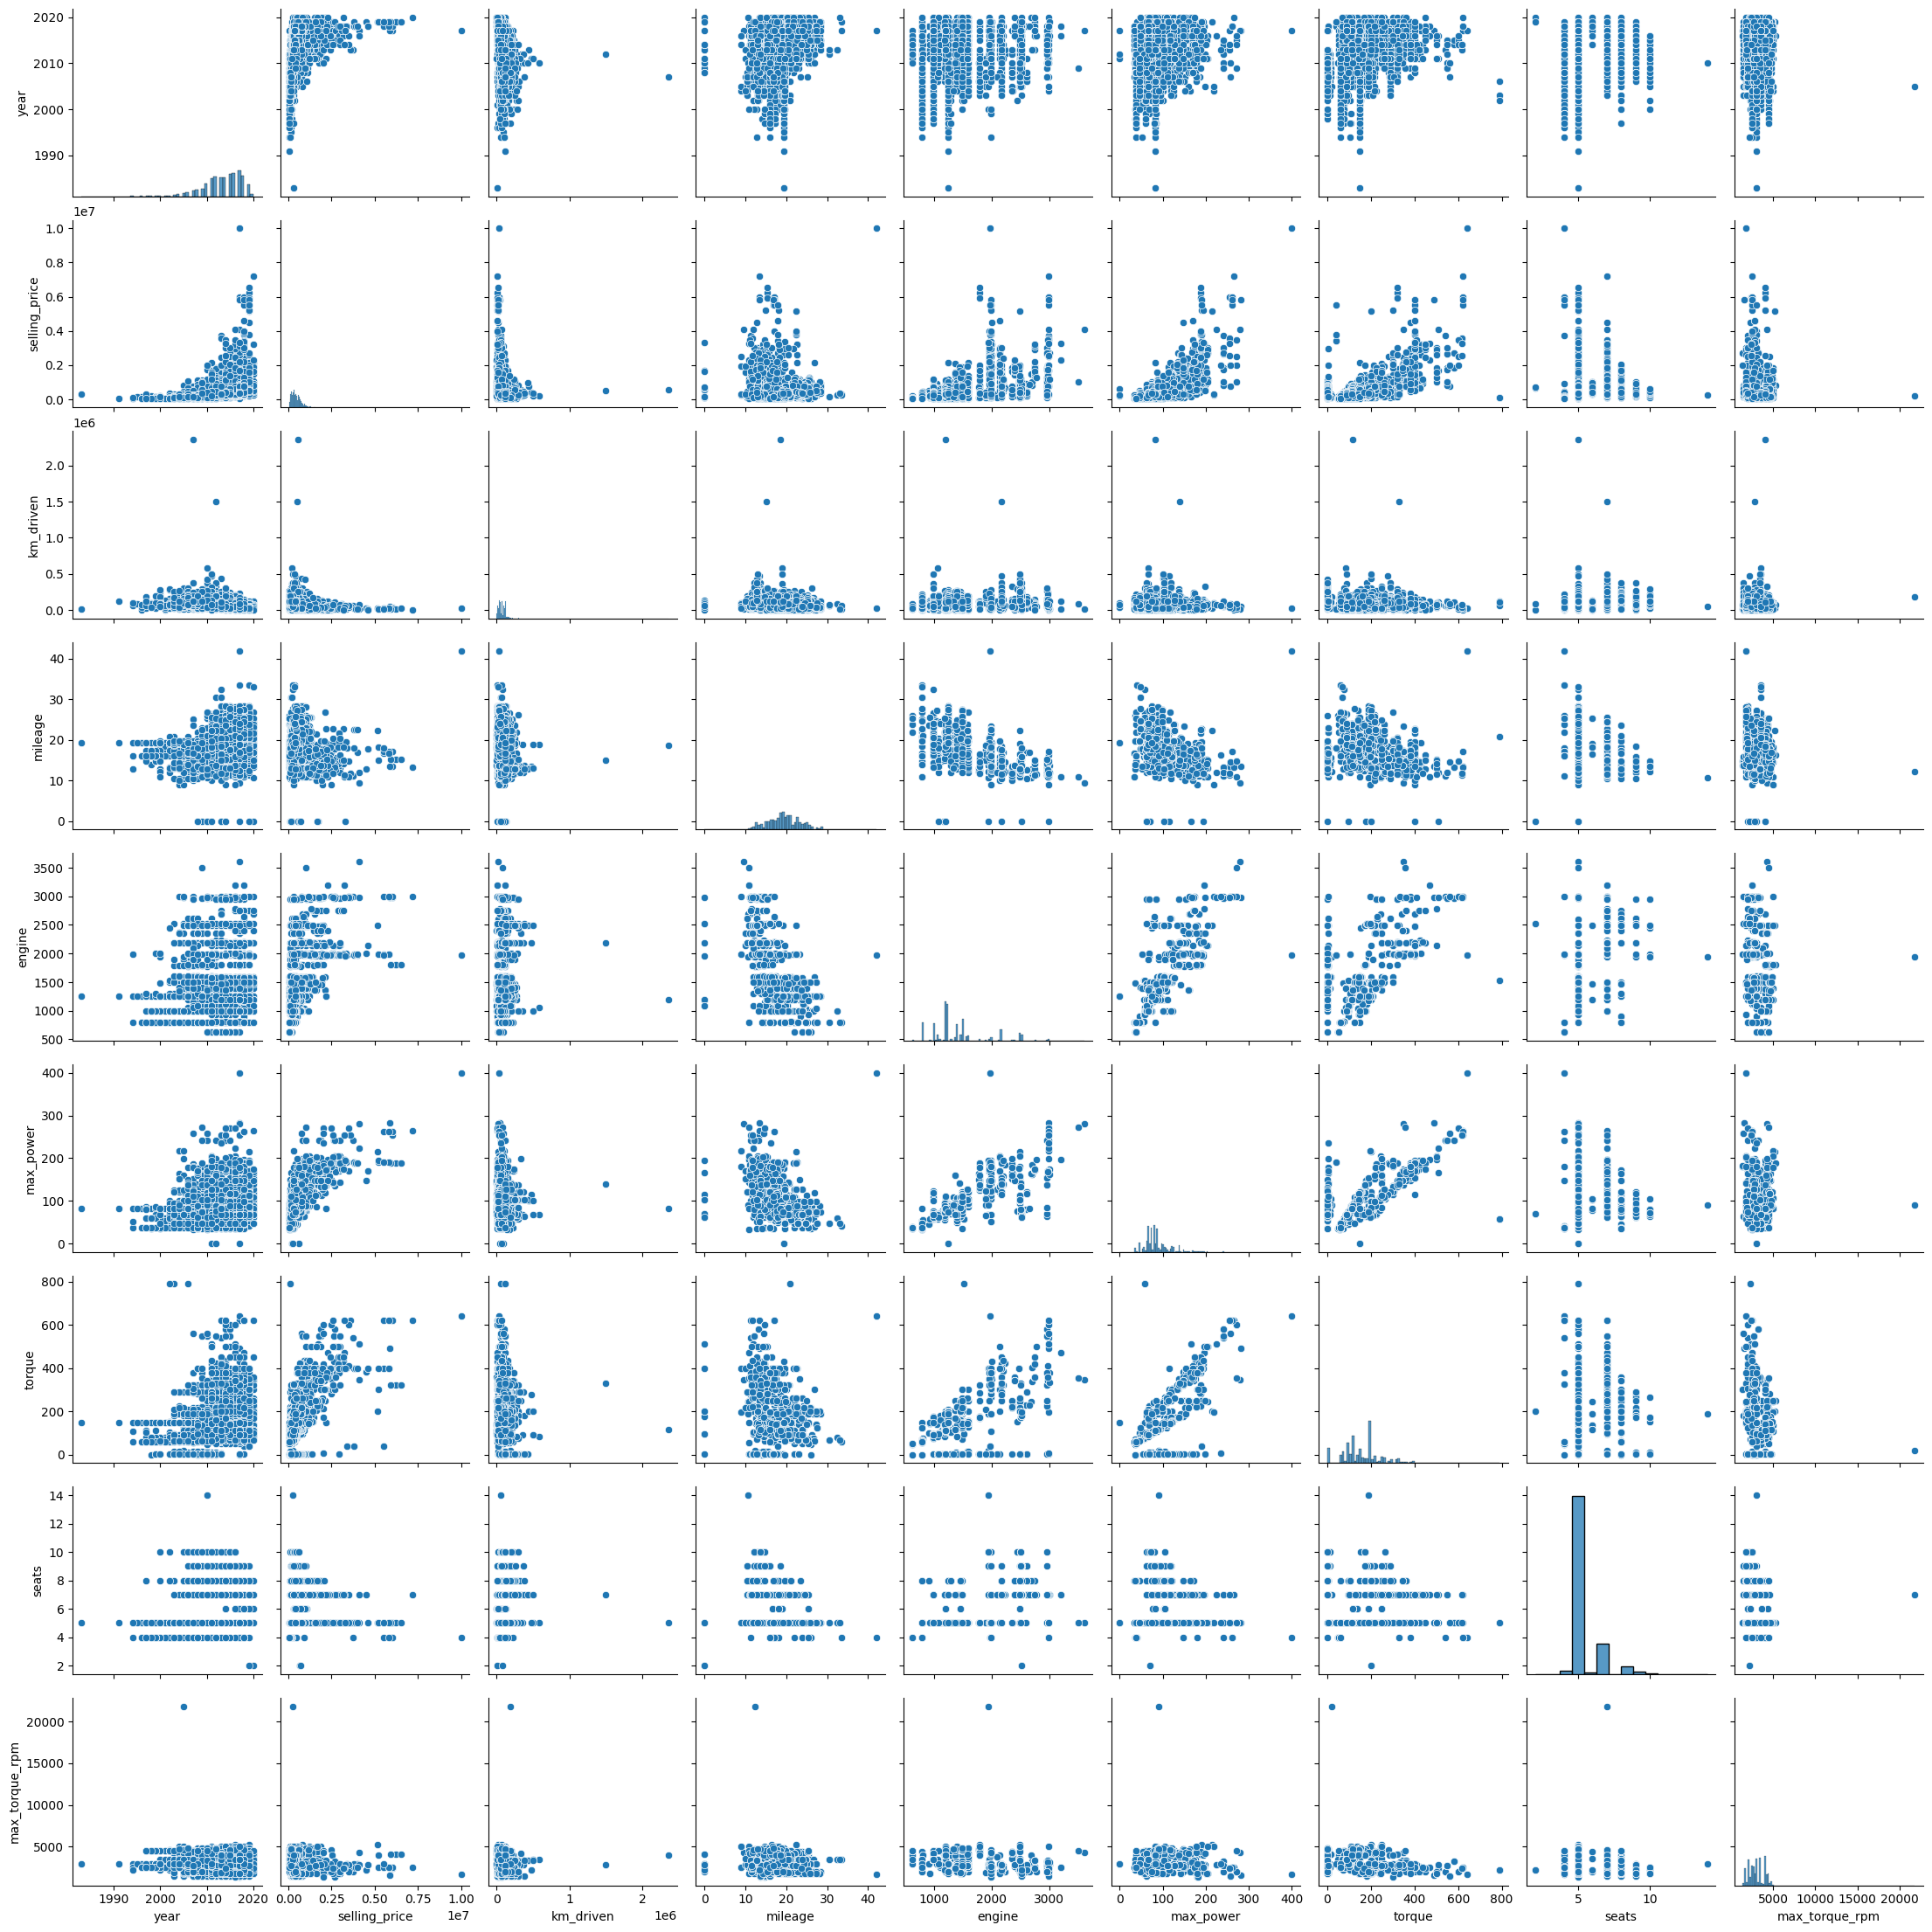

In [342]:
sns.pairplot(df_train);

Распределения признаков по одному и между собой не поменялись

На графиках train в строках по признакам
  - km_driven точки более прижаты к ОХ
  - max_torque_rpm - к ОY

Связано с тем, что в train больше аномально больших/аномально маленьких значений

### Можно ли предположить на основе распределений связь признаков с целевой переменной?

Да, по графику можем отследить линейную зависиость цены от признаков `year`, `engine`, `max_power`, `torque`

Хотелось бы в этот список еще добавить `miliage`, но больше выглядит как облако точек.


### Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Да, предположения о корреляциях выдвинуть можно
- `torque` и `max_power`
- `max_power` и `engine`
- `torque` и `engine`
- `miliage` и `engine` - обратная зависимость

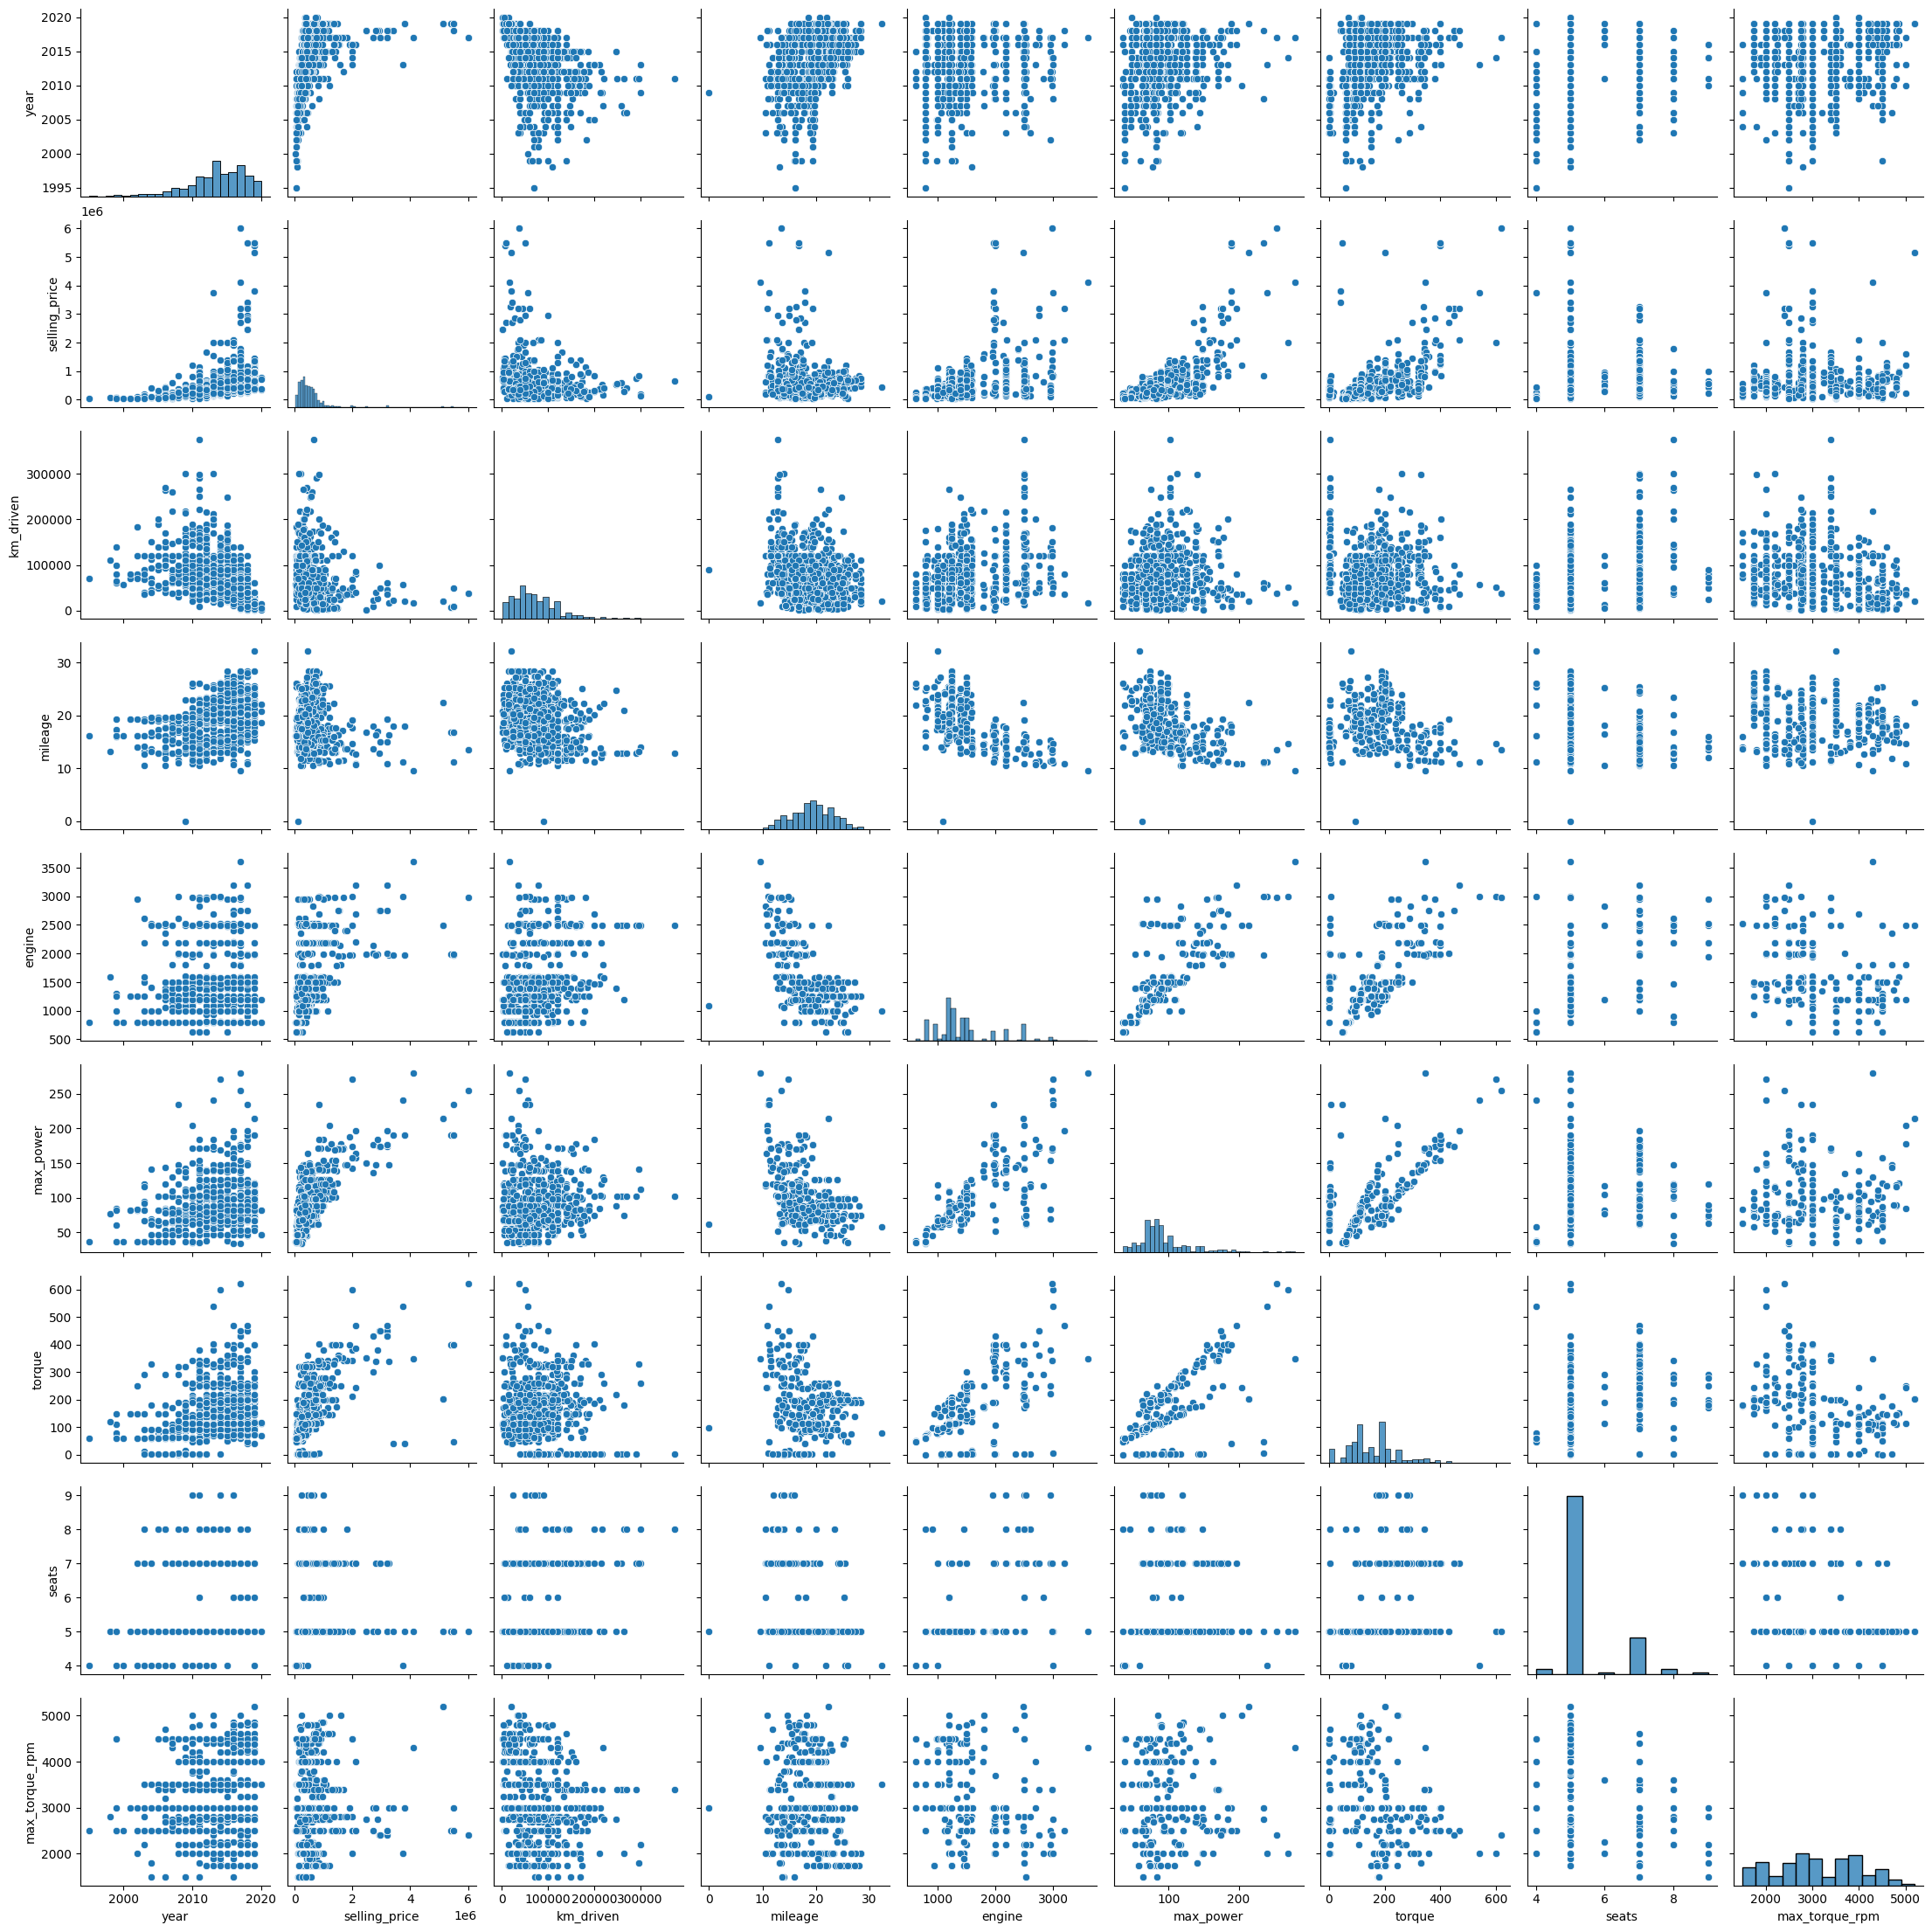

In [343]:
sns.pairplot(df_test);

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [344]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,2.284164,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,1.172674,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.750000,5.0,4000.0


<Axes: >

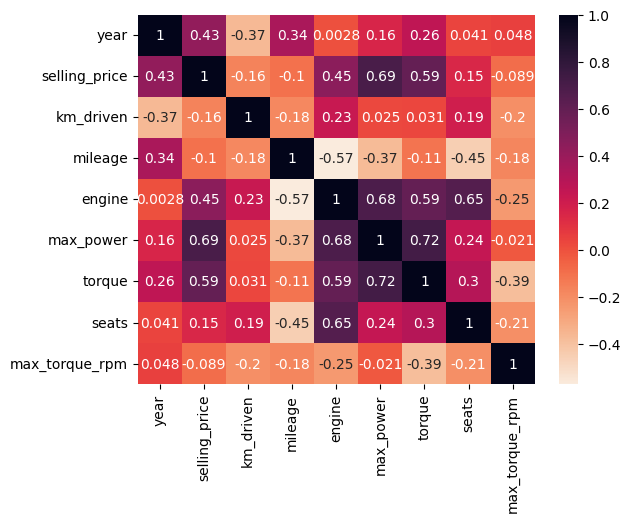

In [345]:
corr_matrix = df_train.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))

In [346]:
# Возможно, немного читерство, но так удобнее искать)
corr_matrix.apply(lambda x: min(abs(x)))

,0
year,0.002819
selling_price,0.088720
km_driven,0.024588
mileage,0.104769
engine,0.002819
max_power,0.021474
torque,0.031135
seats,0.041178
max_torque_rpm,0.021474


- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

`Your answer here`

1. Наименее скоррелированы признаки `year` и `engine`
2. Сильная положительная зависимость между признаками
  - `torque` и `max_power`
  - `torque` и `selling_price`
  - `max_power` и `engine`
  - `torque` и `engine`
  - `engine` и `seats`
  - `torque` и `selling_price`
3. Да, между `year` и `km_driven` набладается отрицательная зависимость - чем меньше год, тем больше км проехала машина
4. В документации указано
> DataFrame.corr(method='pearson', min_periods=1, numeric_only=False)

  Значит по умолчанию используется корреляция Пирсона

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


Формула коэффициента корреляции Спирмена

$$r_{s}=1-\frac{6\sum d^{2}}{n(n^{2}-1)}$$

In [347]:
# расчет по формуле
def spirman_corr(x, y):
  n = len(x)
  d_x = np.argsort(np.argsort(x))
  d_y = np.argsort(np.argsort(y))
  d = d_x - d_y
  suq_sqw_d = np.sum(d ** 2)
  spirman_koeff = 1 - 6*suq_sqw_d/(n*(n**2-1))
  return spirman_koeff

def spirman_all_df(df):
  df_columns = df.columns
  n_columns = len(df_columns)
  corr_matrix = np.ones((n_columns, n_columns))

  # заполняем матрицу в np.array и далее переводим ее в DataFrame
  for i in range(n_columns):
    for j in range(n_columns):
      corr_matrix[i, j] = spirman_corr(df[df_columns[i]], df[df_columns[j]])

  corr_matrix_df = pd.DataFrame(corr_matrix, index=df_columns, columns=df_columns)
  return corr_matrix_df

In [348]:
#spirman_all_df(df_train)
spirman_all_df(df_train.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1))

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.705083,-0.567031,0.344179,-0.038301,0.165631,0.252336,0.045115,0.076982
selling_price,0.705083,1.000000,-0.295273,0.026304,0.462233,0.611807,0.616708,0.224200,-0.127375
km_driven,-0.567031,-0.295273,1.000000,-0.198025,0.302698,0.039766,0.109268,0.108045,-0.319912
mileage,0.344179,0.026304,-0.198025,1.000000,-0.428647,-0.308642,-0.028993,-0.302795,-0.175044
engine,-0.038301,0.462233,0.302698,-0.428647,1.000000,0.711058,0.673020,0.354557,-0.370960
max_power,0.165631,0.611807,0.039766,-0.308642,0.711058,1.000000,0.660307,0.198034,-0.025825
torque,0.252336,0.616708,0.109268,-0.028993,0.673020,0.660307,1.000000,0.251180,-0.479089
seats,0.045115,0.224200,0.108045,-0.302795,0.354557,0.198034,0.251180,1.000000,-0.134184
max_torque_rpm,0.076982,-0.127375,-0.319912,-0.175044,-0.370960,-0.025825,-0.479089,-0.134184,1.000000


In [349]:
corr_matrix_spearman = df_train.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1).corr(method='spearman')
corr_matrix_spearman

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.707123,-0.569659,0.346132,-0.038056,0.165798,0.254618,0.048291,0.076177
selling_price,0.707123,1.000000,-0.295665,0.026186,0.463577,0.612258,0.618280,0.317605,-0.128278
km_driven,-0.569659,-0.295665,1.000000,-0.198466,0.304504,0.040919,0.109585,0.195317,-0.321286
mileage,0.346132,0.026186,-0.198466,1.000000,-0.429871,-0.308824,-0.028652,-0.435458,-0.175808
engine,-0.038056,0.463577,0.304504,-0.429871,1.000000,0.713113,0.675342,0.527716,-0.373703
max_power,0.165798,0.612258,0.040919,-0.308824,0.713113,1.000000,0.660858,0.304857,-0.026137
torque,0.254618,0.618280,0.109585,-0.028652,0.675342,0.660858,1.000000,0.366659,-0.481615
seats,0.048291,0.317605,0.195317,-0.435458,0.527716,0.304857,0.366659,1.000000,-0.203730
max_torque_rpm,0.076177,-0.128278,-0.321286,-0.175808,-0.373703,-0.026137,-0.481615,-0.203730,1.000000


<Axes: >

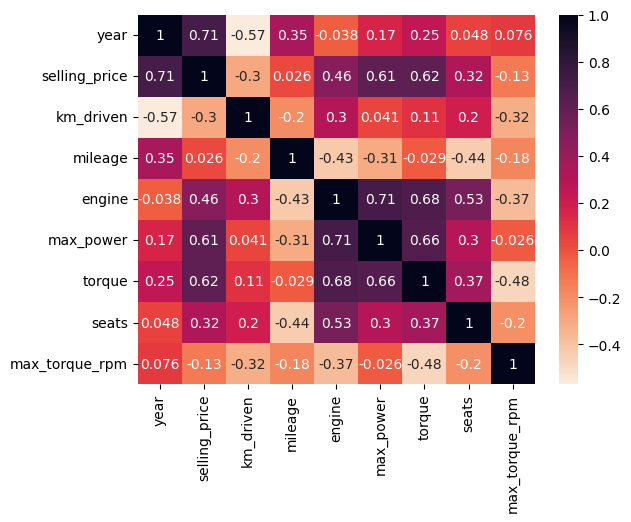

In [350]:
sns.heatmap(corr_matrix_spearman, annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))

`Your answer here`
1. Вычисления вручную практически совпадают с вычислениями с помощью библиотеки. Относительно большие различия наблюдаем только в колонке `seats` - это колонка, которую можно отнести как к числовым признака, так и к категориям. Предположу, что такие кейсы в библиотека обрабатывает как-то по-особенному
2. Существенно усилилась корреляция между `selling_price` и `year`


In [351]:
phik_corr_matrix = df_train.phik_matrix()
phik_corr_matrix

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
name,1.000000,0.948995,0.994871,0.000000,1.000000,0.799127,1.000000,0.830098,0.999690,1.000000,0.997906,0.999932,0.999985,0.999946
year,0.948995,1.000000,0.219841,0.081574,0.205834,0.232412,0.153714,0.418636,0.279253,0.213156,0.381639,0.326411,0.288178,0.269787
selling_price,0.994871,0.219841,1.000000,0.000000,0.157885,0.334505,0.463058,0.557641,0.649768,0.503682,0.872166,0.747189,0.196447,0.204000
km_driven,0.000000,0.081574,0.000000,1.000000,0.046285,0.000000,0.012824,0.087887,0.081625,0.210747,0.000000,0.066843,0.096223,0.049779
fuel,1.000000,0.205834,0.157885,0.046285,1.000000,0.050771,0.053721,0.030943,0.582304,0.644421,0.236006,0.662490,0.450714,0.564479
seller_type,0.799127,0.232412,0.334505,0.000000,0.050771,1.000000,0.127968,0.176612,0.064736,0.160346,0.331904,0.218599,0.032173,0.149248
transmission,1.000000,0.153714,0.463058,0.012824,0.053721,0.127968,1.000000,0.096990,0.331889,0.520161,0.511877,0.552196,0.045734,0.030724
owner,0.830098,0.418636,0.557641,0.087887,0.030943,0.176612,0.096990,1.000000,0.152406,0.186011,0.121438,0.227615,0.046741,0.111955
mileage,0.999690,0.279253,0.649768,0.081625,0.582304,0.064736,0.331889,0.152406,1.000000,0.588155,0.687235,0.722236,0.679979,0.311541
engine,1.000000,0.213156,0.503682,0.210747,0.644421,0.160346,0.520161,0.186011,0.588155,1.000000,0.720780,0.881254,0.603400,0.641002


<Axes: >

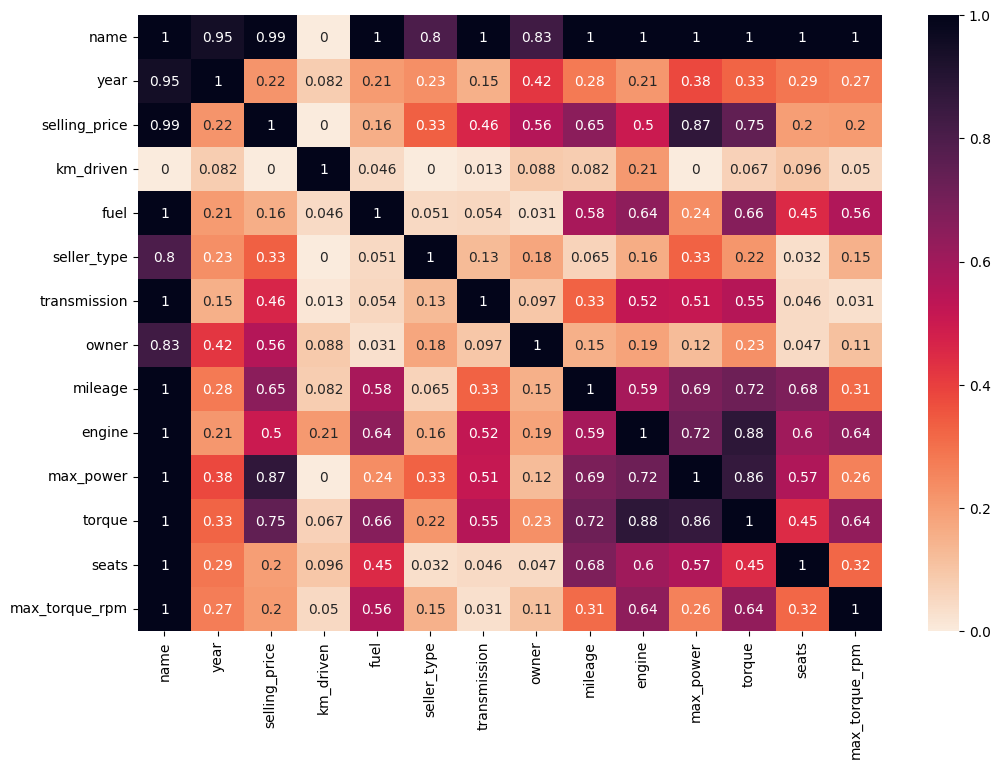

In [352]:
plt.figure(figsize=(12, 8))
sns.heatmap(phik_corr_matrix, annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))

### Выводы:
1. Колонку name можно исключить из матрицы корреляций, так как она не информативна (практически все значения уникальны)
2. Добавились новые пары сильных корреляций:
  - `selling_price` и `owner`
  - `fuel` и `torque`
  - `fuel` и `engine`
  - `fuel` и `milliage`
  - `fuel` и `max_torque_rmp`
  - `transmission` и `torque`

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

In [353]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [354]:
df_train_numbers = df_train.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)

y_train = df_train_numbers['selling_price']
X_train = df_train_numbers.drop('selling_price', axis=1)

In [355]:
# опишите выбранные вещественные признаки
"""
Ничего не понятно, очень интересно)
Если нужно описать что означают признаки

- year - год выпуска авто
- km_driven - пробег
- mileage	 - расход топлива
- engine - объем двигателя
- max_power - максимальная мощность
- torque - крутящий момент
- seats - количество посадочных мест
- обороты максимального крутящего момента

"""

# Если нужно воспользоваться .describe()
X_train.describe()

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,7.395224e+04,19.430841,1429.448973,87.906371,159.724806,5.426712,3046.645205
std,4.095622,6.007114e+04,3.985973,485.662834,31.640418,93.054441,0.982344,912.076209
min,1983.000000,1.000000e+00,0.000000,624.000000,0.000000,0.489464,2.000000,1400.000000
25%,2011.000000,3.900000e+04,16.950000,1197.000000,68.000000,99.000000,5.000000,2250.000000
50%,2014.000000,7.000000e+04,19.370000,1248.000000,81.860000,150.000000,5.000000,3000.000000
75%,2017.000000,1.000000e+05,22.300000,1498.000000,99.000000,200.000000,5.000000,4000.000000
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,789.000000,14.000000,21800.000000


In [356]:
df_test_numbers = df_test.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)

y_test = df_test_numbers['selling_price']
X_test = df_test_numbers.drop('selling_price', axis=1)

In [357]:
X_test.describe()

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,71393.341000,19.33881,1454.87600,90.841670,163.004273,5.403000,3099.776000
std,4.012149,48486.218662,3.95175,521.99574,34.893389,95.807395,0.912921,878.545644
min,1995.000000,1303.000000,0.00000,624.00000,34.200000,0.622027,4.000000,1500.000000
25%,2011.000000,37000.000000,16.55000,1197.00000,69.000000,99.040000,5.000000,2500.000000
50%,2014.000000,61500.000000,19.37000,1248.00000,82.425000,150.000000,5.000000,3000.000000
75%,2017.000000,100000.000000,22.30000,1582.00000,102.000000,200.000000,5.000000,4000.000000
max,2020.000000,375000.000000,32.26000,3604.00000,280.000000,620.000000,9.000000,5200.000000


### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [358]:
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

pred_train = simple_model.predict(X_train)
pred_test = simple_model.predict(X_test)

print(f'''Metrics train:
R2={r2_score(y_train, pred_train)}
mse={MSE(y_train, pred_train)}
\n
Metrics test:
R2={r2_score(y_test, pred_test)}
mse={MSE(y_test, pred_test)}
''')

Metrics train:
R2=0.6015394494587286
mse=114214070108.31871


Metrics test:
R2=0.5984758520560197
mse=230807546016.59525



Значения R2 на test и train совпадают, mse на тесте в 2 раза больше чем на train, но одинаково большое(
  
Хорошо что модель не переобучилась и хорошо что R2 > 0.5 (для первого захода)

Плохо что mse такой большой (хотя мб здесь существенно сказались выбросы)

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

Формула
$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (\hat{y}_i - y_i)^2}{\sum_{i=1}^{n} (\bar{y} - y_i)^2} $$

$\hat{y}_i$ - предсказание модели на i-м наблюдении

${y}_i$ - "истинное" значение признака

$\bar{y}$ - среднее по целевому признаку

${\sum_{i=1}^{n} (\hat{y}_i - y_i)^2}$ - сумма квадратов остатков

${\sum_{i=1}^{n} (\bar{y} - y_i)^2}$ - дисперия * (кол-во наблюдений - 1)

$ \frac{\sum_{i=1}^{n} (\hat{y}_i - y_i)^2}{\sum_{i=1}^{n} (\bar{y} - y_i)^2} $ - доля необъясненной дисперсии

$ R^2 = 1 - \frac{\sum_{i=1}^{n} (\hat{y}_i - y_i)^2}{\sum_{i=1}^{n} (\bar{y} - y_i)^2} $ - доля объясненной дисперсии

In [359]:
# а насколько "руками" нужно реализовать? NumPy хотя бы можно пользоваться?
# Елена на лекции говорила, что явные (и неявные) чиклы мы в ML не пишем...

def r2_manual(y, pred_y):
  y_mean = y.mean()
  a = sum((pred_y - y)**2)
  b = sum((y_mean - y)**2)
  r2 = 1-a/b
  return r2

# проверяем
print(f'''
Для train - {r2_manual(y_train, pred_train)}

Для test - {r2_manual(y_test, pred_test)}
''')


Для train - 0.6015394494587285

Для test - 0.5984758520560196



Совпадает с расчетами "из коробки"

`Your answer here` Описала выше

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [360]:
# your code here

`Your answer here`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [361]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [362]:
scaller_model = LinearRegression()
scaller_model.fit(X_train_scaled, y_train)

pred_train = scaller_model.predict(X_train_scaled)
pred_test = scaller_model.predict(X_test_scaled)

print(f'''Metrics train:
R2={r2_score(y_train, pred_train)}
mse={MSE(y_train, pred_train)}
\n
Metrics test:
R2={r2_score(y_test, pred_test)}
mse={MSE(y_test, pred_test)}
''')

Metrics train:
R2=0.6015394494587282
mse=114214070108.31883


Metrics test:
R2=0.5984758520560193
mse=230807546016.5955



Качество модели не поменялось

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [363]:
scaller_model.intercept_, scaller_model.coef_

(np.float64(522960.0910958865),
 array([161988.17975859, -48568.95541623,  -9601.87853839,  22427.40296172,
        317641.53273363,  23232.61740247, -31308.46395861, -52170.91362541]))

In [364]:
X_test.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm'],
      dtype='object')

In [365]:
max(abs(scaller_model.coef_))

np.float64(317641.53273363295)

Это пятый по счету признак, а значит наиболее информативный признак это `max_power`

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [366]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled, y_train)

pred_train = lasso_model.predict(X_train_scaled)
pred_test = lasso_model.predict(X_test_scaled)

print(f'''Metrics train:
R2={r2_score(y_train, pred_train)}
mse={MSE(y_train, pred_train)}
\n
Metrics test:
R2={r2_score(y_test, pred_test)}
mse={MSE(y_test, pred_test)}
''')

Metrics train:
R2=0.6015394494105242
mse=114214070122.13594


Metrics test:
R2=0.5984745218993515
mse=230808310628.63165



Закрадывается ощущение, что что-то явно идет не так...

Lasso показывает такое же качество(

In [367]:
# Смотрим на веса
lasso_model.intercept_, lasso_model.coef_

(np.float64(522960.0910958865),
 array([161985.87467714, -48568.04510878,  -9598.46991268,  22425.50710686,
        317642.33640015,  23232.87470946, -31304.54677744, -52168.54162595]))

L1-регуляризация не занулила веса

Потенциальные причины
1. Мы отмасштабировали данные
2. Все признаки важны (в это верится слабо)
3. Возможно у нас слишком маленький набор данных

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [368]:
parameters = {
    'alpha': np.logspace(-3, 1, 10)   # коэффициент при регуляризации L1
}

model = Lasso(random_state=random_state)
grid_search = GridSearchCV(model, parameters, cv=10, scoring='r2', n_jobs=-1)

# cv - кол-во фолдов
# scoring - метрика, которую оптимизируем
# n_jobs = -1 - не используем распараллеливание

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01])},
             scoring='r2')

0_0 Какие интерактивные визуализации!

Пришлось обучать 10 моделей

Лучший коэффициент регуляризации среди обученных моделей = 10

Веса не занулились(


In [369]:
best_model_lasso = grid_search.best_estimator_
coefficients = best_model_lasso.coef_
coefficients

array([161965.1506396 , -48559.88251344,  -9567.72253925,  22408.75672713,
       317649.46351162,  23235.15350333, -31269.41645281, -52147.15380171])

In [370]:
pred_train = best_model_lasso.predict(X_train_scaled)
pred_test = best_model_lasso.predict(X_test_scaled)

print(f'''Metrics train:
R2={r2_score(y_train, pred_train)}
mse={MSE(y_train, pred_train)}
\n
Metrics test:
R2={r2_score(y_test, pred_test)}
mse={MSE(y_test, pred_test)}
''')

Metrics train:
R2=0.6015394446541309
mse=114214071485.5006


Metrics test:
R2=0.5984625780548847
mse=230815176291.4952



**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [371]:
parameters = {
    'alpha': np.logspace(-3, 1, 10),   # коэффициент при регуляризации L1
    'l1_ratio': np.linspace(0, 1, 11)  # пропорция между L1 и L2
}

model = ElasticNet(random_state=random_state)
grid_search = GridSearchCV(model, parameters, cv=10, scoring='r2', n_jobs=-1)

# cv - кол-во фолдов
# scoring - метрика, которую оптимизируем
# n_jobs = -1 - не используем распараллеливание

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='r2')

Пришлось обучать 10*11=110 моделей

Оптимальные параметры:
- alpha = 1.2915496650148828
- l1_ratio = 0.9

In [372]:
best_model_elastic = grid_search.best_estimator_
coefficients = best_model_elastic.coef_
coefficients

array([140004.89820244, -49621.66404932,  -3756.62809357,  52917.78045832,
       237957.29831491,  71399.96083106, -32197.1926998 , -23050.60082326])

In [373]:
pred_train = best_model_elastic.predict(X_train_scaled)
pred_test = best_model_elastic.predict(X_test_scaled)

print(f'''Metrics train:
R2={r2_score(y_train, pred_train)}
mse={MSE(y_train, pred_train)}
\n
Metrics test:
R2={r2_score(y_test, pred_test)}
mse={MSE(y_test, pred_test)}
''')

Metrics train:
R2=0.5936094616274467
mse=116487108643.47562


Metrics test:
R2=0.5661703686929322
mse=249377660357.40063



Значение матрики стало хуже(

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [374]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [375]:
# можно выделить марки машин
df_train['auto_mark'] = df_train['name'].apply(lambda x: x.split()[0])
df_test['auto_mark'] = df_test['name'].apply(lambda x: x.split()[0])
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm,auto_mark
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,2000.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,2500.0,Skoda
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,2.284164,5.0,2750.0,Hyundai
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,1.172674,5.0,4500.0,Maruti
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.750000,5.0,4000.0,Hyundai


In [376]:
# аналогично делаем датасет для обучения числовые+категориальные признаки
df_train_cat = df_train.drop('name', axis=1)
y_train_cat = df_train_cat['selling_price']
X_train_cat = df_train_cat.drop('selling_price', axis=1)

df_test_cat = df_test.drop('name', axis=1)
y_test_cat = df_test_cat['selling_price']
X_test_cat = df_test_cat.drop('selling_price', axis=1)

In [377]:
X_train_cat.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm,auto_mark
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,2000.0,Maruti
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,2500.0,Skoda
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,2.284164,5.0,2750.0,Hyundai
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,1.172674,5.0,4500.0,Maruti
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.750000,5.0,4000.0,Hyundai


In [378]:
X_train_cat.shape

(5840, 13)

Признаков 13, так как я разделила `torque` на 2 столбца и выделила признак `auto_mark`

In [379]:
#assert X_train_cat.shape == (5840, 11)

In [380]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,auto_mark
count,5840,5840,5840,5840,5840
unique,4,3,2,5,30
top,Diesel,Individual,Manual,First Owner,Maruti
freq,3177,5223,5336,3603,1804


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [381]:
cat_features = ['fuel',	'seller_type', 'transmission', 'owner',	'auto_mark', 'seats']

# обучаем на train
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train_cat[cat_features])

# получаем список колонок
ohe_cat_features = encoder.get_feature_names_out(cat_features)

# применяем к train и test, создаем промежуточный DataFrame и присоединяем к исходному
ohe_train = pd.DataFrame(
    encoder.transform(X_train_cat[cat_features]),
    columns=ohe_cat_features,
    index=X_train_cat.index
)

ohe_test = pd.DataFrame(
    encoder.transform(X_test_cat[cat_features]),
    columns=ohe_cat_features,
    index=X_test_cat.index
)

X_train_cat = pd.concat([X_train_cat, ohe_train], axis=1)
X_test_cat = pd.concat([X_test_cat, ohe_test], axis=1)

In [382]:
# удаляем исходные категориальные признаки

X_train_cat = X_train_cat.drop(cat_features, axis=1)
X_test_cat = X_test_cat.drop(cat_features, axis=1)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Your answer here`

1. Обучаем OHE на train, используем для train и test, используем `handle_unknown='ignore'` для новых категорий
2. Удаляем 1 столбец для каждой категории, чтобы исключить линейную зависимость (будет появляться из-за того что есть bias и ohe1+ohe2+..+ohen = 1)
3. Можно удалять только сразу все столбцы одной категории (например, все столбцы категории `seats`). Если удалить только часть - категории станут неразличимыми


### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [383]:
parameters = {
    'alpha': np.logspace(-3, 1, 10),   # коэффициент при регуляризации L2
}

model = Ridge(random_state=random_state)
grid_search = GridSearchCV(model, parameters, cv=10, scoring='r2', n_jobs=-1)

# cv - кол-во фолдов
# scoring - метрика, которую оптимизируем
# n_jobs = -1 - не используем распараллеливание

grid_search.fit(X_train_cat, y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01])},
             scoring='r2')

In [384]:

best_model_ridge = grid_search.best_estimator_
coefficients = best_model_ridge.coef_

In [385]:
pred_train = best_model_ridge.predict(X_train_cat)
pred_test = best_model_ridge.predict(X_test_cat)

print(f'''Metrics train:
R2={r2_score(y_train, pred_train)}
mse={MSE(y_train, pred_train)}
\n
Metrics test:
R2={r2_score(y_test, pred_test)}
mse={MSE(y_test, pred_test)}
''')

Metrics train:
R2=0.7726716650308024
mse=65161016197.23584


Metrics test:
R2=0.7801698746992831
mse=126364633412.42934



Ура! R2 удалось повысить на 0.18 пунктов!

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [386]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [387]:
def business_metrics(y_true, y_pred):
  a = abs(y_pred - y_true)/y_true    # вычисляем отклонение по модулю и считаем долю - на сколько отклонилиь
  b = len(a[a <= 0.1]) / len(a)      # вычисляем долю наблюдений, где отклонение <= 10%
  return b

In [388]:
pred_test_simple = simple_model.predict(X_test)
pred_test_scaller = scaller_model.predict(X_test_scaled)
pred_test_lasso = lasso_model.predict(X_test_scaled)
pred_test_best_model_lasso = best_model_lasso.predict(X_test_scaled)
pred_test_best_model_elastic = best_model_elastic.predict(X_test_scaled)
pred_test = best_model_ridge.predict(X_test_cat)

print(f'''
Metrics:
simple_model:       {business_metrics(y_test, pred_test_simple)}
scaller_model:      {business_metrics(y_test, pred_test_scaller)}
lasso_model:        {business_metrics(y_test, pred_test_lasso)}
best_model_lasso:   {business_metrics(y_test, pred_test_best_model_lasso)}
best_model_elastic: {business_metrics(y_test, pred_test_best_model_elastic)}
best_model_ridge:   {business_metrics(y_test, pred_test)}
''')


Metrics:
simple_model:       0.236
scaller_model:      0.236
lasso_model:        0.236
best_model_lasso:   0.236
best_model_elastic: 0.26
best_model_ridge:   0.298



Наилучший результат у модели с категориальными признаками (best_model_ridge)

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [389]:
def your_business_metrics(y_true, y_pred):

    errors = y_pred - y_true
    weights = np.where(errors < 0, 3, 1.0) # за недопрогнозы штрафуем в 3 раза больше

    return (np.abs(errors)*weights).mean()

print(f'''
Metrics:
simple_model:       {your_business_metrics(y_test, pred_test_simple)}
scaller_model:      {your_business_metrics(y_test, pred_test_scaller)}
lasso_model:        {your_business_metrics(y_test, pred_test_lasso)}
best_model_lasso:   {your_business_metrics(y_test, pred_test_best_model_lasso)}
best_model_elastic: {your_business_metrics(y_test, pred_test_best_model_elastic)}
best_model_ridge:   {your_business_metrics(y_test, pred_test)}
''')


Metrics:
simple_model:       495119.18053116486
scaller_model:      495119.1805311713
lasso_model:        495118.88542387984
best_model_lasso:   495116.3643521
best_model_elastic: 490647.07555973076
best_model_ridge:   356397.0052440236



Наилучший результат также у модели с категориальными признаками (best_model_ridge)

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.
